Train on 7982 samples, validate on 1000 samples
Epoch 1/100
7982/7982 [==============================] - 4s 486us/step - loss: 3.6692 - acc: 0.1244 - val_loss: 3.0352 - val_acc: 0.5260
Epoch 2/100
7982/7982 [==============================] - 0s 47us/step - loss: 3.0692 - acc: 0.3871 - val_loss: 2.5823 - val_acc: 0.5450
Epoch 3/100
7982/7982 [==============================] - 0s 46us/step - loss: 2.6891 - acc: 0.4696 - val_loss: 2.2569 - val_acc: 0.5760
Epoch 4/100
7982/7982 [==============================] - 0s 47us/step - loss: 2.4079 - acc: 0.5147 - val_loss: 2.0235 - val_acc: 0.5940
Epoch 5/100
7982/7982 [==============================] - 0s 47us/step - loss: 2.2061 - acc: 0.5398 - val_loss: 1.8564 - val_acc: 0.6170
Epoch 6/100
7982/7982 [==============================] - 0s 47us/step - loss: 2.0461 - acc: 0.5770 - val_loss: 1.7378 - val_acc: 0.6330
Epoch 7/100
7982/7982 [==============================] - 0s 47us/step - loss: 1.9183 - acc: 0.5876 - val_loss: 1.6390 - val_acc: 0.6470

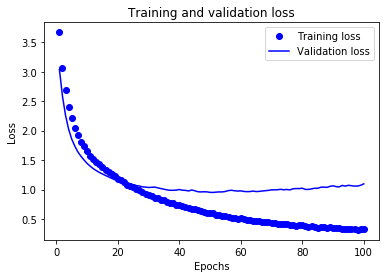

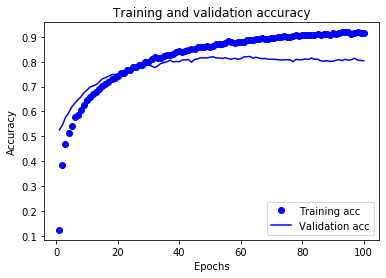

In [0]:
from keras.datasets import reuters
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
import matplotlib.pyplot as plt
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

def vectorize_sequences(sequences,dimension = 10000):
  results = np.zeros((len(sequences),dimension))
  for [i,sequence] in enumerate(sequences):
    results [i,sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#we convert the scalar labels into binary vectors of 46 elements
#where an element is 1 if the label corresponds to the respective class 
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)


model = models.Sequential()
model.add(layers.Dense(64, activation='elu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='elu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))#The softmax activation computes a probability distribution over the 46 output classes

optimizers.RMSprop(lr=0.0001, rho=0.9)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

#We set appart 1000 samples(around 10% of the total data) for creating a cross validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

n_epochs = 100
history = model.fit(partial_x_train,partial_y_train,epochs = n_epochs,batch_size=4096,validation_data=(x_val, y_val))

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,n_epochs + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

